# Introduction to neural network classification with TensorFlow

 A classification is where you try to cassify something as one thing or another

 * Binary classificaion
 * Multiclass classification
 * Multilabel classification

# Creating data to view and fit

In [50]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import datetime
import numpy as np
import itertools

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    if model.output_shape[-1] > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

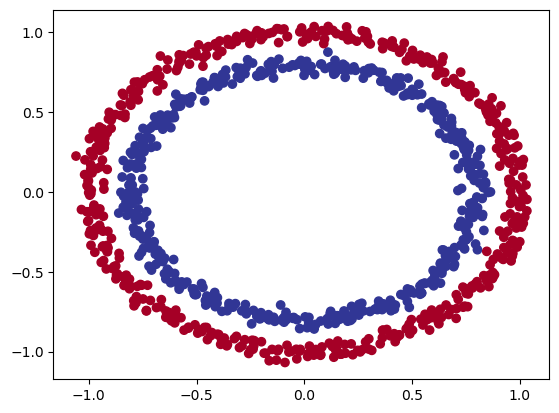

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
  X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFloe are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [ ]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard

In [ ]:
# # Set the random seed
# tf.random.set_seed(42)

# # Initialize W&B
# wandb.init(project="Classification_fundamentals", name="Dense:1:Sigmoid.SGD.E:5")

# # 1. Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, activation="sigmoid")  # Add activation="sigmoid"
# ])

# # 2. Compile the model
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["accuracy"])  # Use a list for metrics

# # Set up TensorBoard callback
# model_info = "Sigmoid.SGD.E:5"
# log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# # 3. Fit the model with both callbacks
# model.fit(X, y, epochs=5, callbacks=[tensorboard_callback, WandbCallback()])

In [ ]:
# import os
# import datetime

# # Set the random seed
# tf.random.set_seed(42)

# # Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, activation="sigmoid")  # Add activation="sigmoid"
# ])

# # Compile the model
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["accuracy"])  # Use a list for metrics

# # Specify absolute path for TensorBoard logs
# absolute_path = os.path.abspath(
#     "C:\\Users\\Kajetan\\tensorflow_fundamentals-main\\logs\\fit"
# )

# # Set up TensorBoard callback
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=absolute_path)

# # Fit the model with both callbacks
# model.fit(X, y, epochs=5, callbacks=[tensorboard_callback])


In [ ]:
# Start a new TensorBoard instance
%tensorboard --logdir logs/fit

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_1, show_shapes=True)

NameError: name 'model_1' is not defined

In [ ]:
tf.random.set_seed(42)

wandb.init(project="Classification_fundamentals", name="Dense:100:10:1.Relu.Sigmoid.E:250")

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model_into = "Dense:100:10:1.Relu.Sigmoid.E:250"
log_dir = "logs/fit" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    profile_batch=0,  # No profiling
    write_images=True,  # Weight images
    embeddings_freq=1,
    embeddings_metadata='Dense:100:10:1.Relu.Sigmoid.E:250.tsv',
    update_freq='epoch'  # update after each epoch
)

model.fit(X, y, epochs=250, callbacks=[tensorboard_callback, WandbCallback()])

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
# SInce we're working on a binary classfication problem and our odewl is getting aroud 50% acccuracy...
# it is preforming as
# So let's step things up a notch and add an extra layer

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Initialize W&B
wandb.init(project="Classification_fundamentals", name="Dense:1,1.Relu,Sigmoid.E:100")

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# Set up TensorBoard callback
model_info = "Dense:1,1.Relu,Sigmoid.E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    profile_batch=1,
    write_images=True,
    embeddings_freq=1,
    embeddings_metadata="Dense:1,1.Relu,Sigmoid.E:100.tsv",
    update_freq="epoch"
)

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0, callbacks=[tensorboard_callback, WandbCallback()])

In [ ]:
model_2.evaluate(X, y)

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
circles["label"].value_counts()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_3, show_shapes=True)

## Improving our  model

1. Create a model - we might to dd moe layers or increase the number of hidden units within a layer
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fir our model for more epochs (leave it training for longer)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
wandb.init(project="Classification_fundamentals", name="Dense:100relu,10relu,1sigmoid.Adam.E:100")
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Set up TensorBoard callback with default values
model_info = "Dense:100relu,10relu,1sigmoid.Adam.E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y:%:m%:d-%H%:M%:S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
history = model_3.fit(X, y, epochs=100, verbose=0, callbacks=[tensorboard_callback, WandbCallback()])

model_3.save("/home/kajetan/tensorflow_fundamentals/02_best_models_keras/model_3.keras")
history_df = pd.DataFrame(history.history)
history_df.to_csv("/home/kajetan/tensorflow_fundamentals/02_best_models_history/model_3_history.csv", index=False)

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
model_3.evaluate(X, y)

In [ ]:
metric_names = model_2.metrics_names

prefixed_metric_names_2 = [f"Model_2_{metric}" for metric in metric_names]
prefixed_metric_names_3 = [f"Model_3_{metric}" for metric in metric_names]

df = pd.DataFrame({
    "Metric": metric_names + metric_names,
    "Value": model_2.evaluate(X, y) + model_3.evaluate(X, y),
    "Model":  prefixed_metric_names_2 + prefixed_metric_names_3
})

df

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
wandb.init(project="Classification_fundamentals", name="Dense:100relu,10relu,1sigmoid.Adam.E:30")
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Set up TensorBoard callback with default values
model_info = "Dense:100relu,10relu,1sigmoid.Adam.E:30"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_4.fit(X, y, epochs=30, verbose=0, callbacks=[tensorboard_callback, WandbCallback()])

In [ ]:
%tensorboard --logdir logs/fit

To visualize our model's predictions, let's create a function `plot_decision_boundary()`

* Take in a trained model, features (X), and labels (y)
* Create a meshgrid of the different X values
* Make predictions accros the meshgrid
* Plot the predicitoons as well as a line between zones

In [ ]:
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

In [ ]:
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1
    x_min, x_max, y_min, y_max

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Oh wait... we compiled our model for a binary classification proble.

But... we're working on a regression problem, let's change the model to suit our data

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

model_info = "Regression.Dense:100,10,1.Adam:E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100,
           callbacks=[tensorboard_callback])

In [ ]:
model_3.evaluate(X_reg_train, y_reg_train)

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

model_info = "Regression.Dense:20,10,1.Adam:E:20"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=20,
           callbacks=[tensorboard_callback])

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True, to_file='model_4.png')


In [ ]:

# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();


# The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

model_info = "Regression.Dense:1.Adam.E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

model_5.fit(X, y, epochs=100, callbacks=[tensorboard_callback])

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Check the decision boundary
plot_decision_boundary(model=model_5,
                      X=X,
                      y=y)

Let's try build our first neural network with non -lineral activation function.

In [ ]:
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics="accuracy")

model_info = "Classification:Dense:1.Adam,lr=0.001.E:100"
log_dir = "logs/dir" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_6.fit(X, y, epochs=100, callbacks=[tensorboard_callback])

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
# Check the decision boundary
plot_decision_boundary(model=model_6,
                      X=X,
                      y=y)

In [ ]:
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics="accuracy")

model_info = "Classification:Dense:5,5.Adam,lr=0.001.E:100"
log_dir = "logs/fit" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_6.fit(X, y, epochs=100, callbacks=[tensorboard_callback])

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics="accuracy")

model_info = "Classification:Dense:5,5,1.Adam,lr=0.001.E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_7.fit(X, y, epochs=100, callbacks=[tensorboard_callback])

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
model_7.evaluate(X, y)

In [ ]:
model_6.evaluate(X, y)

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_6, show_shapes=True)

In [ ]:
plot_model(model_7, show_shapes=True)

In [ ]:
# How do our model predicitons look?
plot_decision_boundary(model_6, X, y)

In [ ]:
plot_decision_boundary(model_7, X, y)

In [ ]:
plot_decision_boundary(model_3, X, y)

In [ ]:
# 4. Evaluate the model
model_3.evaluate(X, y)

In [ ]:
model_6.evaluate(X, y)

In [ ]:
model_7.evaluate(X, y)

In [ ]:
# Creaet a toy a tensor (similar to the data we pass into our moels)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Let's start by replicating sigmoid - sigmoid(X) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmodi funciton of our toy tensor
sigmoid(A)

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
    return tf.maximum(x, 0)

relu(A)

In [ ]:
plt.plot(relu(A))

In [ ]:
plt.plot(tf.nn.softmax(A))

In [ ]:
tf.keras.activations.linear(A)

In [ ]:
# Does the linear activation fucntion change anything?
plt.plot(tf.keras.activations.linear(A))

In [ ]:
A == tf.keras.activations.linear(A)

## Evaluating and improving ou classification

In [ ]:
# Check how many examples we have
len(X)

In [55]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
import os
import datetime

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # Add activation="sigmoid"
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])  # Use a list for metrics

# Specify absolute path for TensorBoard logs
absolute_path = os.path.abspath(
    "/home/kajetan/tensorflow_fundamentals/logs/fit"
)

# Set up TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=absolute_path)

# 3. Fit the model
history = model_8.fit(X, y, epochs=25, callbacks=[tensorboard_callback])
model_8.save("/home/kajetan/tensorflow_fundamentals/best_models_keras/model_8.keras")

Epoch 1/25
32/32 [==============================] - 1s 1ms/step - loss: 0.7047 - accuracy: 0.4590
Epoch 2/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.4670
Epoch 3/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 4/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 5/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4700
Epoch 6/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 7/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 8/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 9/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5040
Epoch 10/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 11/25
32/32 [

FileNotFoundError: [Errno 2] No such file or directory: '/home/kajetan/tensorflow_fundamentals/best_models_keras/model_8.keras'

In [ ]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 6175), started 0:00:42 ago. (Use '!kill 6175' to kill it.)

In [ ]:
# 4 Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4950


[0.6932331919670105, 0.4950000047683716]

In [51]:

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

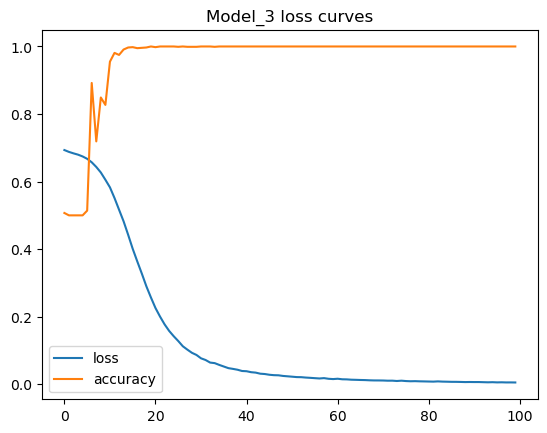

In [52]:
import pandas as pd

# Load the training history from a CSV file
loaded_model_3_history = pd.read_csv("/home/kajetan/tensorflow_fundamentals/02_best_models_history/model_3_history.csv")

# Plot the training history
loaded_model_3_history.plot()
plt.title("Model_3 loss curves")
plt.show()

In [53]:
from tensorflow.keras.models import load_model

loaded_model_3 = load_model("/home/kajetan/tensorflow_fundamentals/02_best_models_keras/model_3.keras")

313/313 [==============================] - 0s 659us/step
doing binary classifcation...
313/313 [==============================] - 0s 650us/step
doing binary classifcation...


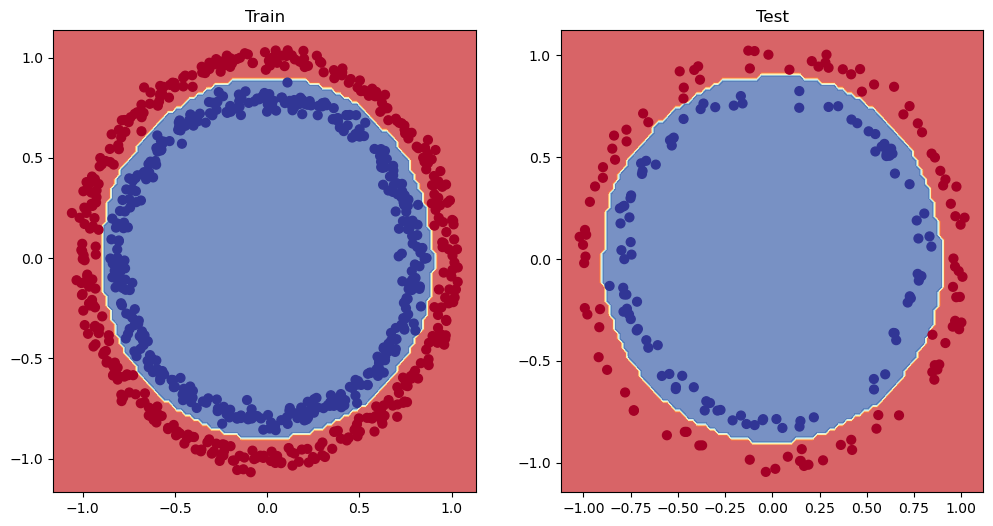

In [56]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(loaded_model_3, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(loaded_model_3, X=X_test, y=y_test)
plt.show()

In [58]:
# Convert the hitory object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.011683,0.203733,1.764150,0.2788
1,1.599594,0.376950,1.437244,0.4192
2,1.310987,0.470583,1.215443,0.5106
3,1.143489,0.552783,1.087925,0.5837
4,1.037930,0.603217,1.009846,0.6079
5,0.973567,0.621667,0.962234,0.6171
6,0.931805,0.628067,0.929386,0.6228
7,0.902358,0.632100,0.907051,0.6264
8,0.880087,0.646467,0.889059,0.6511
9,0.862580,0.664367,0.874203,0.6596


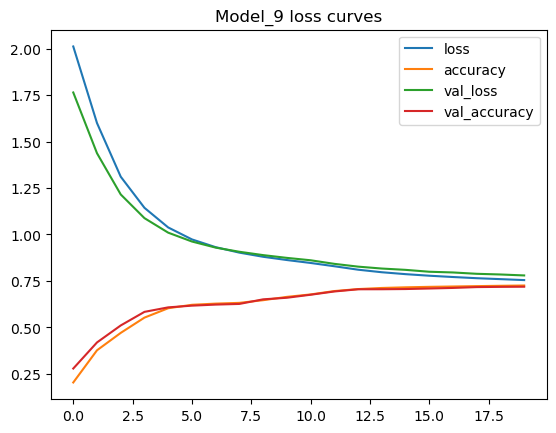

In [59]:
# plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_9 loss curves");

## Finding the best learning rate

TO find the ideal learnig rate (the learning rate whete the loss decreases the most during trianing) we're going to use the following steps:
* A leearning raet **callback** - you can tthink of a callback as an extra piec of functionality, you can add to you **while** its training.
* Another model (we could use the same one as above, but we're practing building

In [ ]:
import os

tf.random.set_seed(42)

# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callbacks
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

absolute_path = os.path.abspath(
    "/home/kajetan/tensorflow_fundamentals/logs/fit"
)

# Set up TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=absolute_path)

# Fit the model
history_10 = model_10.fit(X_train,
                       y_train,
                       epochs=100,
                       callbacks=[lr_scheduler, tensorboard_callback])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.8161 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8119 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8076 - accuracy: 0.5025 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8030 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7983 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7934 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7879 - accuracy: 0.4938 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7827 - accuracy: 0.4913 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.4888 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7048 - accuracy: 0.4787 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7000 - accuracy: 0.4988 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7024 - accuracy: 0.4963 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7064 - accuracy: 0.4863 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7091 - accuracy: 0.4988 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7107 - accuracy: 0.5088 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7011 - accuracy: 0.4988 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7104 - accuracy: 0.5

<Axes: xlabel='epochs'>

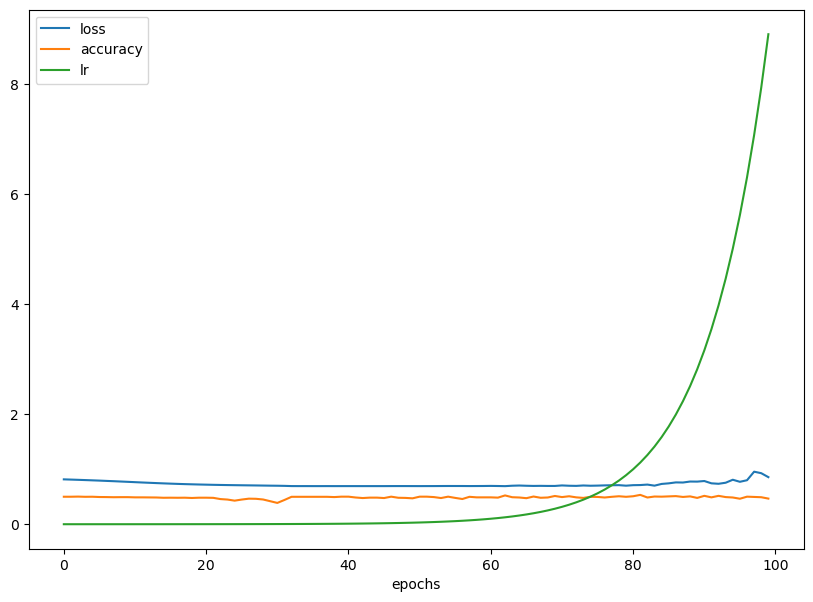

In [ ]:
# Checkout the history
pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

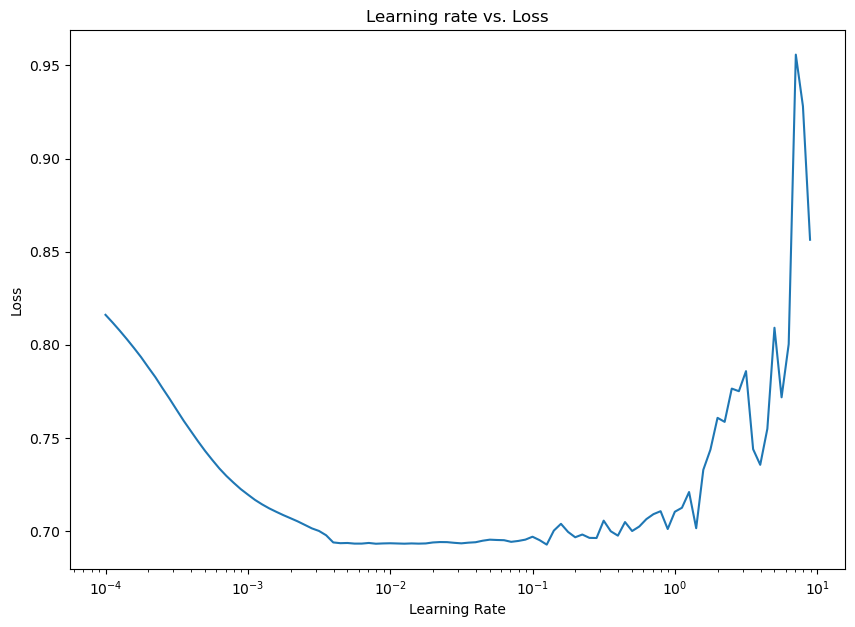

In [ ]:
# Plot the learning rate versys the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [ ]:
1e-1, 1e-2, 1e-3, 1e-4, 2e-2

(0.1, 0.01, 0.001, 0.0001, 0.02)

In [65]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3753 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1555 - accuracy: 0.1517 - val_loss: 1.9325 - val_accuracy: 0.2423
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7953 - accuracy: 0.2659 - val_loss: 1.7271 - val_accuracy: 0.2974
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5796 - accuracy: 0.3281 - val_loss: 1.5223 - val_accuracy: 0.3225
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4891 - accuracy: 0.3410 - val_loss: 1.5031 - val_accuracy: 0.3325
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4515 - accuracy: 0.3507 - val_loss: 1.4490 - val_accuracy:

In [69]:
# Evaluate
model_11.evaluate(X_test, y_test)

ValueError: in user code:

    File "/home/kajetan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/home/kajetan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/kajetan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/home/kajetan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/home/kajetan/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/kajetan/anaconda3/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(None, 2)


In [68]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


313/313 [==============================] - 0s 668us/step
doing binary classifcation...
313/313 [==============================] - 0s 653us/step
doing binary classifcation...


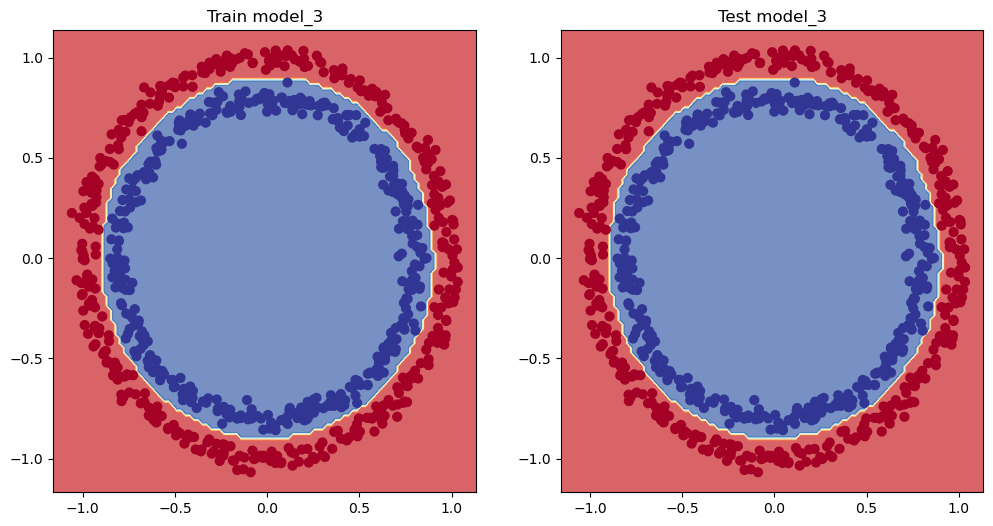

In [71]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train model_3")
plot_decision_boundary(loaded_model_3, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test model_3")
plot_decision_boundary(loaded_model_3, X=X_train, y=y_train)

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a  handful of other classfication evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.3800 - accuracy: 0.8550
Model loss on the test set: 0.3799596130847931
Model accuracy on the test set: 85.50%


How about a confusion matrix?

In [64]:
y_preds = model_11.predict(X_test)
y_preds

NameError: name 'model_11' is not defined

In [ ]:
y_preds = tf.math.sigmoid(y_preds)
y_preds

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[0.67766064],
       [0.7055873 ],
       [0.6698865 ],
       [0.6634966 ],
       [0.52462256],
       [0.6643786 ],
       [0.6873396 ],
       [0.6749995 ],
       [0.7062202 ],
       [0.51843494],
       [0.69410837],
       [0.68163455],
       [0.68045133],
       [0.71355116],
       [0.6932819 ],
       [0.68241054],
       [0.65027595],
       [0.6743189 ],
       [0.50598043],
       [0.67265457],
       [0.6647863 ],
       [0.67088556],
       [0.6700976 ],
       [0.6884373 ],
       [0.5145483 ],
       [0.6747834 ],
       [0.71345526],
       [0.68125755],
       [0.58047163],
       [0.6641166 ],
       [0.6326564 ],
       [0.66520274],
       [0.6808331 ],
       [0.67339575],
       [0.68079   ],
       [0.66577375],
       [0.6758798 ],
       [0.6507303 ],
       [0.6726265 ],
       [0.67416817],
       [0.68683064],
       [0.6761641 ],
       [0.6884373 ],
       [0.502814  ],
       [0.6662809 ],
     

In [ ]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))

array([[  0, 101],
       [  0,  99]])

In [4]:
figsize = (10, 10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):


  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)
    

  if classes:
      labels = classes
  else:
      labels = np.arange(cm.shape[0])  # np.arrange Return evenly spaced values within a given interval.

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold fo different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=15)

# Working with a larger example(multi-class classification)

When ou have more than two classes as an optin, it's known as **multi-class classification**.
* This means if you have 3 difrenretclasses, it's multiclass classification.
* It also means if you have 100 different classes, it's multi-class classification.

To pracice multi-class classification, we're going to build a neural network to classify images of differnet

In [2]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


In [62]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import datetime
import pandas as pd
import wandb
from wandb.keras import WandbCallback
import itertools
from sklearn.metrics import confusion_matrix

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

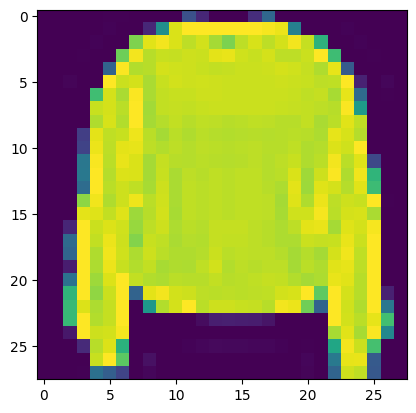

In [4]:
# PLot a single sample
plt.imshow(train_data[7]);

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)


10

Text(0.5, 1.0, 'T-shirt/top')

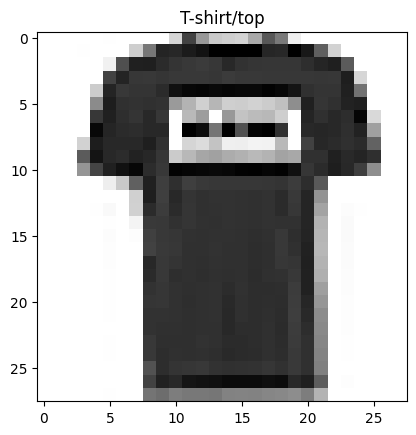

In [6]:
# Plot an example image and its label
index_of_choice = 1
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

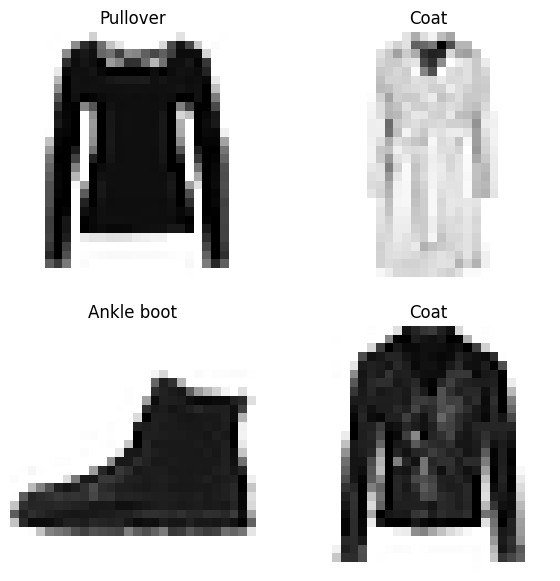

In [7]:
# Plot multiple random images of fashion MNIST
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

* Input shape = 28x28
* Output shape = 10 ( one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax (Not sigmoid)

In [17]:
tf.random.set_seed(42)

model_multi_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_multi_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])


non_norm_history = model_multi_1.fit(train_data,
                                     tf.one_hot(train_labels, depth=10),
                                     epochs=10,
                                     validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.6233 - accuracy: 0.1477 - val_loss: 2.1054 - val_accuracy: 0.1983
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8940 - accuracy: 0.2568 - val_loss: 1.7507 - val_accuracy: 0.3104
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6361 - accuracy: 0.3528 - val_loss: 1.4463 - val_accuracy: 0.4345
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3694 - accuracy: 0.4620 - val_loss: 1.3419 - val_accuracy: 0.4616
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2884 - accuracy: 0.4714 - val_loss: 1.3084 - val_accuracy: 0.4373
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2460 - accuracy: 0.4864 - val_loss: 1.2321 - val_accuracy: 0.5016
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1961 - accuracy: 0.5254 - val_loss: 1.2035 - val_accuracy:

In [19]:
model_multi_1.evaluate(train_data, tf.one_hot(train_labels, depth=10))

1875/1875 [==============================] - 7s 3ms/step - loss: 1.0864 - accuracy: 0.5697


[1.086409568786621, 0.5696666836738586]

In [22]:
model_multi_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 4)                 3140      
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Check the min and max values of the training daa
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have between 0 & 1

In [74]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [29]:

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0112 - accuracy: 0.6433 - val_loss: 0.6428 - val_accuracy: 0.7869
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5915 - accuracy: 0.8019 - val_loss: 0.5861 - val_accuracy: 0.7990
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5478 - accuracy: 0.8126 - val_loss: 0.5693 - val_accuracy: 0.8034
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5285 - accuracy: 0.8185 - val_loss: 0.5467 - val_accuracy: 0.8142
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5181 - accuracy: 0.8203 - val_loss: 0.5387 - val_accuracy: 0.8138
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5087 - accuracy: 0.8238 - val_loss: 0.5459 - val_accuracy: 0.8125
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5036 - accuracy: 0.8256 - val_loss: 0.5555 - val_accuracy:

**Note** Neural network tend to prefer data in numerica form as well as scaled/normalized (0 & 1)

<Axes: title={'center': 'Normalized data'}>

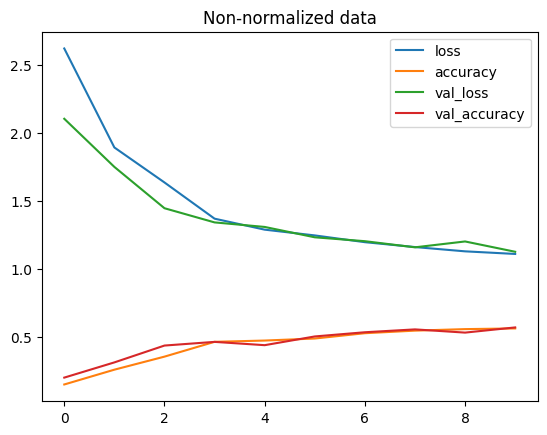

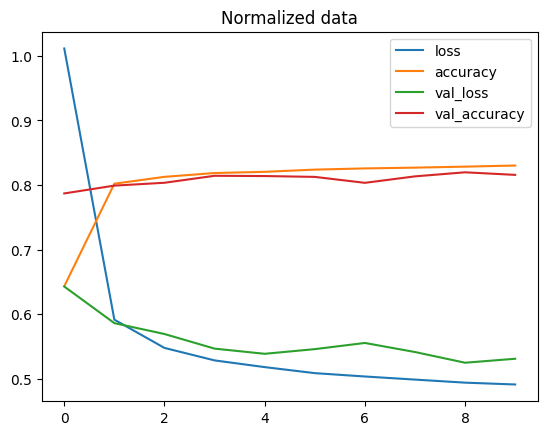

In [31]:
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

The same model with even *slighly* different data can produce  *dramitically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria

## Find the ideal learning rate

In [13]:
tf.random.set_seed(42)

wandb.init(project="clothes_multi-classification", name="Dense:4,4,1.Adam.E:10")
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=40,
                            validation_data=(test_data, test_labels),
                            callbacks=[lr_scheduler, WandbCallback()])

accuracy,▄▄▄▁▂▅▄▁█▂
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▁▁▁▁▁▁▁▁▁
lr,▁▁▂▃▃▄▅▆▇█
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▂▃▁▁▃▁▆▅█
accuracy,0.0983
best_epoch,6
best_val_loss,2.30263
epoch,9
loss,2.30305


Epoch 1/40
   1/1875 [..............................] - ETA: 31:57 - loss: 63.1329 - accuracy: 0.0938

1867/1875 [============================>.] - ETA: 0s - loss: 2.5332 - accuracy: 0.1684

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231219_062637-u1dudd4s/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 11s 5ms/step - loss: 2.5308 - accuracy: 0.1685 - val_loss: 2.0441 - val_accuracy: 0.2067 - lr: 0.0010
Epoch 2/40
1874/1875 [============================>.] - ETA: 0s - loss: 1.9339 - accuracy: 0.2181

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231219_062637-u1dudd4s/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 10s 5ms/step - loss: 1.9337 - accuracy: 0.2182 - val_loss: 1.7956 - val_accuracy: 0.2580 - lr: 0.0011
Epoch 3/40
1860/1875 [============================>.] - ETA: 0s - loss: 1.7126 - accuracy: 0.2644

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231219_062637-u1dudd4s/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 8s 4ms/step - loss: 1.7122 - accuracy: 0.2646 - val_loss: 1.6696 - val_accuracy: 0.2705 - lr: 0.0013
Epoch 4/40
1873/1875 [============================>.] - ETA: 0s - loss: 1.6519 - accuracy: 0.2816

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231219_062637-u1dudd4s/files/model-best)... Done. 0.1s


1875/1875 [==============================] - 7s 4ms/step - loss: 1.6518 - accuracy: 0.2817 - val_loss: 1.5962 - val_accuracy: 0.2904 - lr: 0.0014
Epoch 5/40
1873/1875 [============================>.] - ETA: 0s - loss: 1.6086 - accuracy: 0.2969

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231219_062637-u1dudd4s/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 13s 7ms/step - loss: 1.6087 - accuracy: 0.2969 - val_loss: 1.5859 - val_accuracy: 0.2772 - lr: 0.0016
Epoch 6/40
1859/1875 [============================>.] - ETA: 0s - loss: 1.5241 - accuracy: 0.3352

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231219_062637-u1dudd4s/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 11s 6ms/step - loss: 1.5242 - accuracy: 0.3351 - val_loss: 1.4738 - val_accuracy: 0.3814 - lr: 0.0018
Epoch 7/40
1870/1875 [============================>.] - ETA: 0s - loss: 1.4627 - accuracy: 0.3717

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231219_062637-u1dudd4s/files/model-best)... Done. 0.1s


1875/1875 [==============================] - 14s 7ms/step - loss: 1.4626 - accuracy: 0.3716 - val_loss: 1.4615 - val_accuracy: 0.3289 - lr: 0.0020
Epoch 8/40
1857/1875 [============================>.] - ETA: 0s - loss: 1.4353 - accuracy: 0.3881

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231219_062637-u1dudd4s/files/model-best)... Done. 0.1s


1875/1875 [==============================] - 15s 8ms/step - loss: 1.4349 - accuracy: 0.3879 - val_loss: 1.4219 - val_accuracy: 0.3672 - lr: 0.0022
Epoch 9/40
1868/1875 [============================>.] - ETA: 0s - loss: 1.2993 - accuracy: 0.4676

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231219_062637-u1dudd4s/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 14s 8ms/step - loss: 1.2994 - accuracy: 0.4674 - val_loss: 1.2451 - val_accuracy: 0.4788 - lr: 0.0025
Epoch 10/40
1870/1875 [============================>.] - ETA: 0s - loss: 1.2022 - accuracy: 0.4841

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231219_062637-u1dudd4s/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 9s 5ms/step - loss: 1.2021 - accuracy: 0.4841 - val_loss: 1.2231 - val_accuracy: 0.4791 - lr: 0.0028
Epoch 11/40
1875/1875 [==============================] - ETA: 0s - loss: 1.1878 - accuracy: 0.4846

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231219_062637-u1dudd4s/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 7s 4ms/step - loss: 1.1878 - accuracy: 0.4846 - val_loss: 1.1877 - val_accuracy: 0.4919 - lr: 0.0032
Epoch 12/40
1873/1875 [============================>.] - ETA: 0s - loss: 1.1779 - accuracy: 0.4876

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231219_062637-u1dudd4s/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 7s 4ms/step - loss: 1.1777 - accuracy: 0.4877 - val_loss: 1.1616 - val_accuracy: 0.4986 - lr: 0.0035
Epoch 13/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1766 - accuracy: 0.4871 - val_loss: 1.2099 - val_accuracy: 0.5095 - lr: 0.0040
Epoch 14/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1715 - accuracy: 0.4827 - val_loss: 1.1832 - val_accuracy: 0.4964 - lr: 0.0045
Epoch 15/40
1875/1875 [==============================] - 12s 7ms/step - loss: 1.1717 - accuracy: 0.4866 - val_loss: 1.2153 - val_accuracy: 0.4625 - lr: 0.0050
Epoch 16/40
1860/1875 [============================>.] - ETA: 0s - loss: 1.1797 - accuracy: 0.4830

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231219_062637-u1dudd4s/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 11s 6ms/step - loss: 1.1800 - accuracy: 0.4828 - val_loss: 1.1530 - val_accuracy: 0.5061 - lr: 0.0056
Epoch 17/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2352 - accuracy: 0.4779 - val_loss: 1.2505 - val_accuracy: 0.4347 - lr: 0.0063
Epoch 18/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1876 - accuracy: 0.4803 - val_loss: 1.1967 - val_accuracy: 0.4853 - lr: 0.0071
Epoch 19/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2060 - accuracy: 0.4755 - val_loss: 1.2471 - val_accuracy: 0.4553 - lr: 0.0079
Epoch 20/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2243 - accuracy: 0.4710 - val_loss: 1.1946 - val_accuracy: 0.5021 - lr: 0.0089
Epoch 21/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2282 - accuracy: 0.4643 - val_loss: 1.2969 - val_accuracy: 0.4858 - lr: 0.0100
Epoch 22/40
1875/1875 [==============================] - 6s 3ms

Text(0.5, 1.0, 'Finding the ideal learning rate')

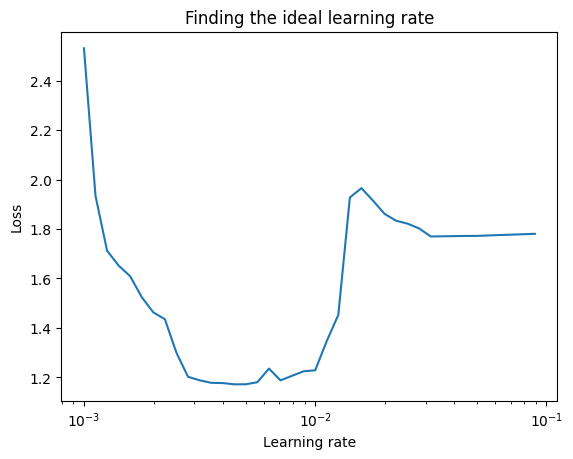

In [16]:
# Plot the leanrning rate decay curve

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, norm_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [94]:

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5175 - accuracy: 0.8203 - val_loss: 0.4235 - val_accuracy: 0.8464
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3790 - accuracy: 0.8633 - val_loss: 0.4535 - val_accuracy: 0.8421
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3439 - accuracy: 0.8734 - val_loss: 0.3958 - val_accuracy: 0.8523
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3199 - accuracy: 0.8832 - val_loss: 0.4004 - val_accuracy: 0.8560
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.8868 - val_loss: 0.3799 - val_accuracy: 0.8667
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2873 - accuracy: 0.8930 - val_loss: 0.3768 - val_accuracy: 0.8592
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2781 - accuracy: 0.8962 - val_loss: 0.3635 - val_accuracy:

# Evaluating our multi-class classification model

* Evaluate its performance using other classificatiin metrics (such as confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architucture)
* Save and export it for use an application)

In [35]:

# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [9]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [95]:
# Mame some predictions with our model
y_probs = model_14

In [96]:
y_probs = model_14.predict(test_data)  # probs is short for "predicion probabilities"

# View the first 5 predictions
y_probs[:5], tf.argmax(y_probs)

313/313 [==============================] - 0s 820us/step


(array([[2.28540941e-07, 8.47257854e-12, 1.51818580e-09, 9.80960244e-11,
         1.24972399e-09, 2.62371559e-05, 1.14550282e-07, 3.78833967e-03,
         4.53513138e-08, 9.96185124e-01],
        [5.53442769e-05, 4.17198047e-12, 9.99285698e-01, 2.47066759e-11,
         6.42516592e-04, 1.11001803e-08, 1.64761168e-05, 1.16702214e-16,
         3.82264741e-11, 2.66124826e-14],
        [4.93382245e-13, 9.99999940e-01, 1.04984943e-19, 8.76146757e-13,
         3.72116091e-18, 4.06782164e-28, 1.98905094e-20, 0.00000000e+00,
         2.37352756e-20, 1.57226752e-29],
        [1.74579656e-11, 9.99999940e-01, 7.67036615e-16, 5.41776832e-11,
         2.30063161e-14, 5.00798722e-23, 2.86392216e-16, 2.60461924e-38,
         1.11953130e-17, 1.92959401e-24],
        [3.98442119e-01, 7.59207259e-13, 3.62585746e-02, 2.09160116e-05,
         5.63716190e-03, 2.95777486e-10, 5.59641182e-01, 1.06548295e-13,
         2.29025188e-10, 2.14586855e-11]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int64, nump

Remember to make predictions on the same kind of tour model was trained on (e.g. if your model was trained on nomalized data, you will want to mak predictions on normalized)

In [97]:
tf.argmax(y_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [98]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [99]:
# Convert all of the prediciton probabilities into integers
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [100]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [101]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                y_pred=y_preds)

array([[841,   2,  15,  20,   7,   1, 109,   0,   5,   0],
       [  3, 973,   3,  16,   3,   0,   1,   0,   1,   0],
       [ 15,   0, 813,  10, 108,   0,  53,   0,   1,   0],
       [ 21,  11,  12, 873,  48,   0,  31,   0,   3,   1],
       [  1,   1,  87,  15, 866,   0,  30,   0,   0,   0],
       [  1,   0,   0,   0,   0, 948,   0,  32,   1,  18],
       [120,   0, 105,  26, 113,   0, 631,   0,   5,   0],
       [  0,   0,   0,   0,   0,   3,   0, 983,   0,  14],
       [  6,   0,   9,   2,   8,   1,   1,   4, 969,   0],
       [  0,   0,   0,   0,   0,   6,   1,  53,   0, 940]])

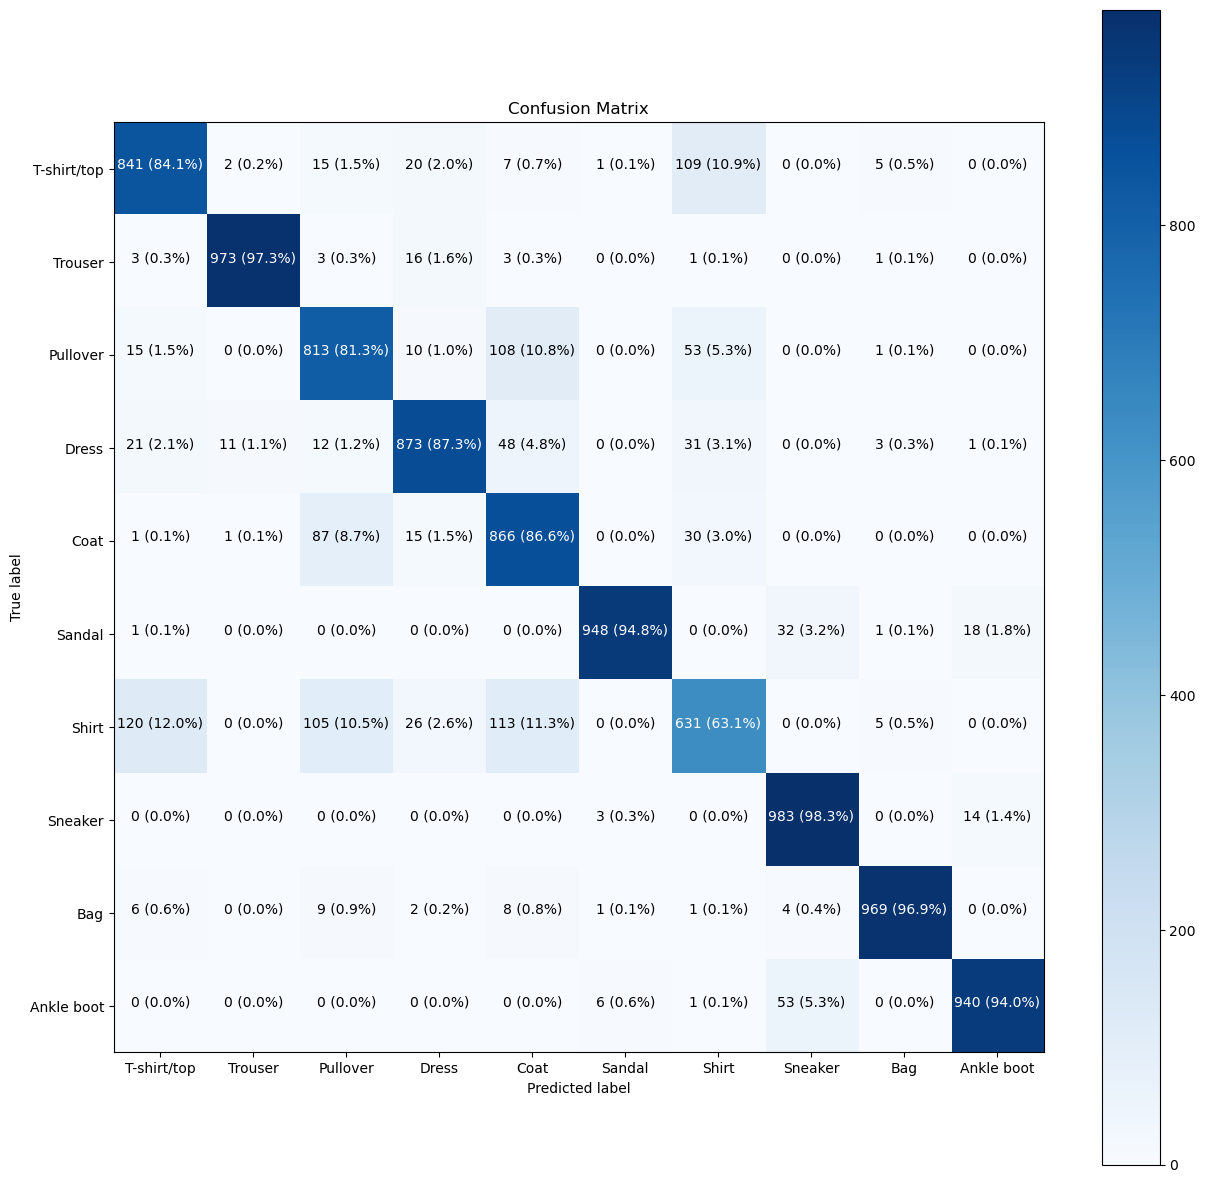

In [102]:
# Make a priettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                    y_pred=y_preds,
                    classes=class_names,
                    figsize=(15, 15),
                    text_size=10)

Often whenworking with images and other forms of visual data, it's a good idea to visualize as much as possible.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on saifd image
* Label the plot with the truth label & the predicted label

In [88]:
import random

def plot_random_image(model, images, true_labels, classes):
    
    # Set up a random integer
    i = random.randint(0, len(images))
    
    # Create predicitons and tragets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    # Add xlabel information (prediciton/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 
                                                100*tf.reduce_max(pred_probs), 
                                                true_label), 
                                                color=color)

1/1 [==============================] - 0s 18ms/step


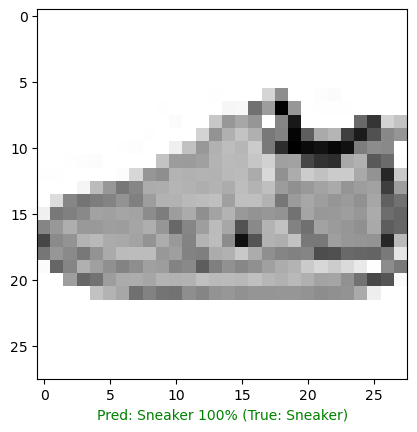

In [113]:
plot_random_image(model=model_14,
                 images=test_data, # Always make predictions on the same kind of data your model was trained on
                 true_labels=test_labels,
                 classes=class_names)

## What patterns is our model learning?

In [114]:
# Find the layers of our most recent model
model_14.layers

In [115]:
# Extract a prticular layer
model_14.layers[1]

In [116]:
# GEt the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.5307364 , -0.51684093,  0.03723723, ...,  0.85392064,
          0.1692793 , -0.40720093],
        [ 0.5383298 ,  0.6129117 , -0.03218368, ..., -0.09588014,
          0.10791397, -0.24941772],
        [ 0.22018199,  0.6123412 , -0.06745066, ..., -0.3896008 ,
          0.03600119,  0.19948572],
        ...,
        [ 0.44923332,  1.0512089 ,  0.28939143, ..., -0.37861675,
          0.07170614,  0.49071467],
        [ 0.42062142,  0.7162028 ,  0.514504  , ..., -0.5752479 ,
          0.20630546,  0.1115198 ],
        [ 0.54027563,  0.60691786,  0.2851544 , ...,  0.06627685,
          0.14641409,  0.27469838]], dtype=float32),
 (784, 100))

In [117]:
model_14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 20)                2020      
                                                                 
 dense_14 (Dense)            (None, 10)                210       
                                                                 
Total params: 80730 (315.35 KB)
Trainable params: 80730 (315.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's check our the bias vector

In [118]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.45061743,  0.25320238,  0.43794724,  0.15846504,  0.5683526 ,
         0.5058818 , -0.01633556, -0.51664823,  0.16989663, -0.03910067,
         0.20651698, -0.01718639,  0.6790687 ,  0.07019503,  0.47144789,
         0.6405151 ,  0.36252406, -0.30962655, -0.17881215,  0.11850909,
         0.38941357,  0.4083915 , -0.01495854, -0.01721343,  0.377753  ,
        -0.43367746, -0.37785834,  0.26616213,  0.44590354, -0.13312376,
         0.5751425 ,  0.49109778,  0.39389634,  0.35836583,  0.33402783,
         0.7210039 , -0.3242099 , -0.2833754 ,  0.8573948 , -0.2497155 ,
         0.27477333, -0.48285207,  0.2297059 , -0.19015066,  0.17198744,
         0.7278186 ,  0.6123637 ,  0.34307384, -0.21008365,  0.42563066,
         0.02706532,  0.34831405,  0.80677134, -0.01559994,  0.03039694,
         0.37917742, -0.26172206,  0.38224795,  0.01719179, -0.01837798,
         0.73709327,  0.6303428 , -0.0146243 ,  0.5176885 ,  0.35108387,
         0.7816191 , -0.5172559 , -0.21732166, -0.3

In [119]:
# Weight has one data value per data point
# Bias has one value per hidden unit

Every neuron has a bias vector. Each of these is paired with a weigths matrix.

The bias vector get initilized as zeros (at least in the ase of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights should influence the next layer.

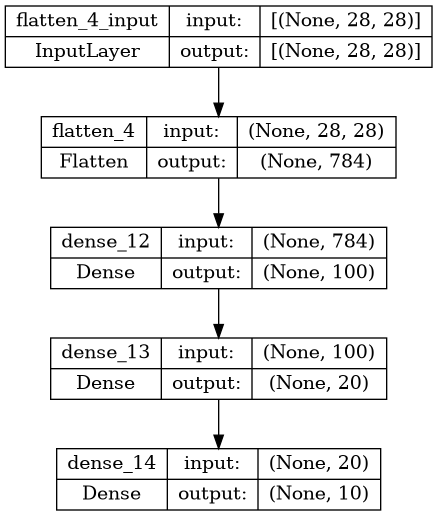

In [121]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outpus of each layer
plot_model(model_14, show_shapes=True)

# Next: check out exercises extra curriculum..